In [1]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
import uproot as up
import pandas as pd
import numpy as np
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import matplotlib.pyplot as plt

In [2]:
# dataset = '../outputs/crab_TTree_13TeV_mmmm_2018BCD.root'   # my processing of 2018
# dataset = '../outputs/crab_TTree_13TeV_fourmuon_2022BC.root'  # my 2022 with updated code
dataset = '../outputs/crab_TTree_13TeV_mmmm_2022All.root'  # my 2022 All with updated code
# dataset = '../outputs/SingleMuon_Run2018-UL2018_Data_TriggerFIX.root' # Jesse's 2018

In [3]:
file = up.open(dataset)
events = file['ntuple;1']
columns = ['B_J1_mass', 'B_U_TriggerPath',
           'B_Mu1_soft', 'B_Mu2_soft', 'B_Mu3_soft', 'B_Mu4_soft',
           'B_J1_VtxProb', 'B_J2_VtxProb', 'B_J3_VtxProb', 'B_J4_VtxProb']
branches = events.arrays(columns)

In [4]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['B_J1_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [5]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 1765642
Number of events Preselection: 762634


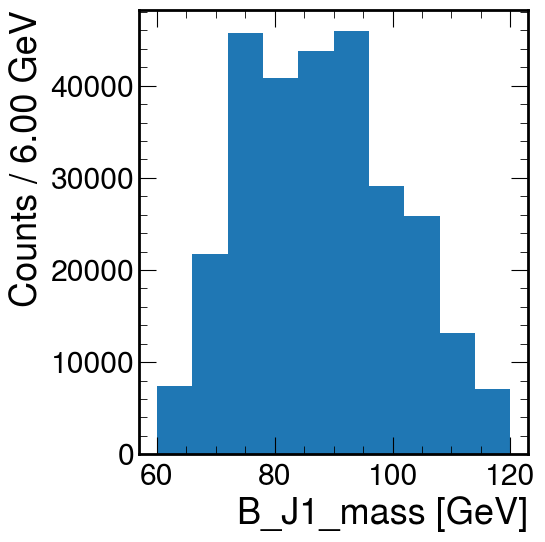

In [6]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()


In [7]:
cut_MuTrigger_candi = branches['B_U_TriggerPath']
cut_MuTrigger_event = ak.any(cut_MuTrigger_candi, axis=1)

branches = branches[cut_MuTrigger_candi][cut_MuTrigger_event]

print_summary(branches, "Trigger")

Number of candidates Trigger: 91817
Number of events Trigger: 60996


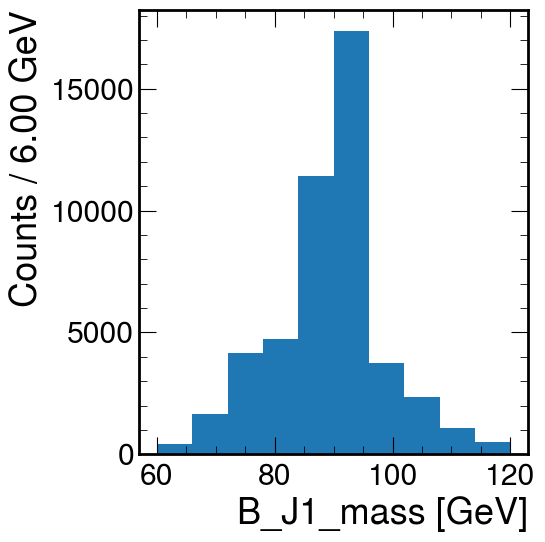

In [8]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

In [10]:
cut_Zsoft_candi = branches['B_Mu1_soft'] & branches['B_Mu2_soft'] & branches['B_Mu3_soft'] & branches['B_Mu4_soft']
cut_Zsoft_event = ak.any(cut_Zsoft_candi, axis=1)

branches = branches[cut_Zsoft_candi][cut_Zsoft_event]

print_summary(branches, "Soft Muons")

Number of candidates Soft Muons: 208
Number of events Soft Muons: 191


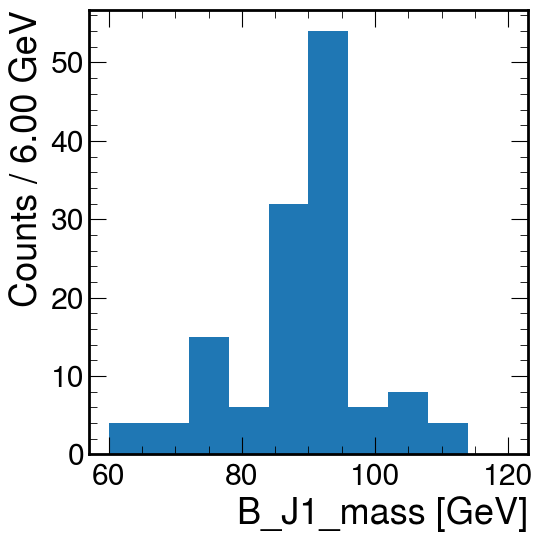

In [11]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()

Number of candidates Dilepton Vtx: 170
Number of events Dilepton Vtx: 159


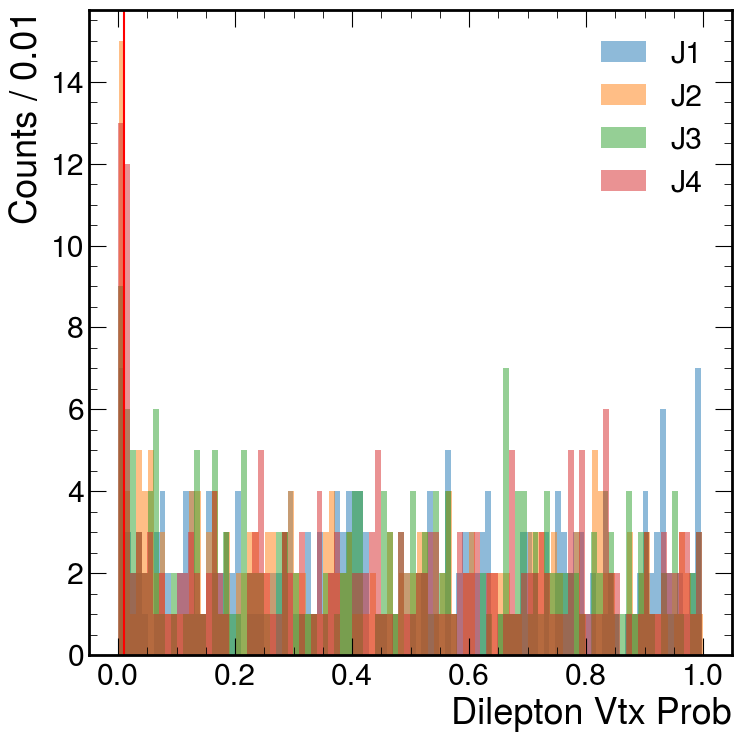

In [12]:
cut_dilepton_candi = (branches['B_J1_VtxProb'] > 0.01) & (branches['B_J2_VtxProb'] > 0.01) & (branches['B_J3_VtxProb'] > 0.01) & (branches['B_J4_VtxProb'] > 0.01)
cut_dilepton_event = ak.any(cut_dilepton_candi, axis=1)


plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 100, 0, 1
plt.hist(ak.flatten(branches.B_J1_VtxProb), bins=nbins, label="J1", alpha=0.5)
plt.hist(ak.flatten(branches.B_J2_VtxProb), bins=nbins, label="J2", alpha=0.5)
plt.hist(ak.flatten(branches.B_J3_VtxProb), bins=nbins, label="J3", alpha=0.5)
plt.hist(ak.flatten(branches.B_J4_VtxProb), bins=nbins, label="J4", alpha=0.5)
plt.axvline(x=0.01, color='r')
plt.xlabel('Dilepton Vtx Prob')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f}")
plt.legend()
plt.tight_layout()

branches = branches[cut_dilepton_candi][cut_dilepton_event]

print_summary(branches, "Dilepton Vtx")

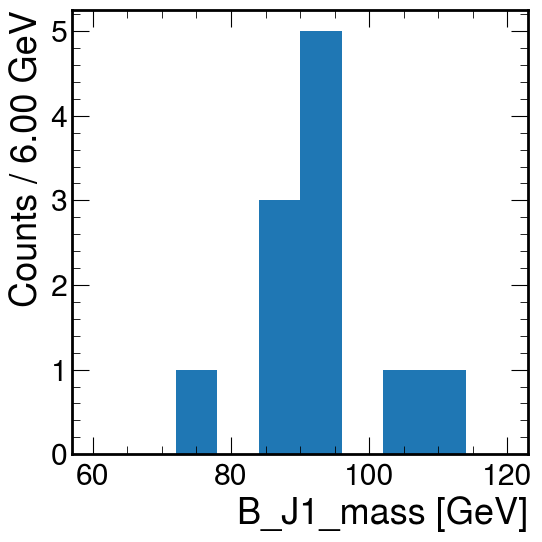

In [12]:
plt.figure(figsize=(6, 6))
nbins, xlow, xhigh = 10, 60, 120
plt.hist(ak.flatten(branches['B_J1_mass']), bins=nbins, range=(xlow, xhigh))
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("B_J1_mass [GeV]")
plt.tight_layout()